<h1><center>Prediction Using Unsupervised Learning</center></h1>

  



<h3><center>What is Unsupervised Learning?</center></h3>

We talk about **Unsupervised learning** when you only have input data X and no corresponding output variables.

Unsupervised learning problems can be grouped into:

* **Dimensional Reduction** such  as Principal Components Analysis (PCA) that we will use in this project,  used for data visualization, dimension reduction or data pre-processing before supervised techniques are applied.

* **Clustering**: class of methods for discovering unknown subgroups or clusters in
data. The aim there is to find a partition of the data into distinct groups so
that the observations within each group are quite similar to each
other.




<h3><center>Clustering</center></h3>

Clustering is a technique that group simular objects such that the objects in the same group are more simular to each other.  

The group of simular objects is calles a **cluster**


<h3><center>Principal Component Analysis</center></h3>


PCA is a dimentionality reduction technique for feature extraction (i.e creates new features from original features)

* PCA  is used to reduce the dimensionality of large data sets
* PCA transforms a large set of variables into a smaller one that still contains most of the information in the large set

PCA can be broken down into 5 Steps: 

* **Step 1.** Standardize the range of continuous initial variables

The aim is to standardize the range of the continuous variables such a way that each of the them contributes equaly to the analysis.

* **Step 2.** Compute the covariance matrix to identify correlations

The aim is to undertand how variables are correlated.
* **Step 3.** Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components

The aim is to determine the principal components of the data.

**Principal Components** are just new variables constructed as linear combination of the initial variables. They are uncorrelated and contains most of the information within the initial variables. 

* **Step 4.** Create a feature vector to decide which principal components to keep

* **Step 5.** Recast the data along the principal components axes




## Loading the Iris Dataset

The Iris dataset that we will use is a csv file containing 6 columns, the id, our features and our output. The name is "Iris.scv".

### Import libraries
Let's first of all import the required libraries.


In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline


In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#prepare the features
X = df.iloc[:,1:5]
 
#prepare the target
target = df.iloc[:,5]

In [4]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
print('X shape', X.shape)


X shape (150, 4)


In [6]:
X.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [7]:
target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

## Step 1: Standardize the Data


PCA is affected by scale so we need to scale the features in our data before applying PCA.

 There is a package called `StandardScaler`  that help us to standardize the dataset’s features onto unit scale <font color=red>(mean = 0 and variance = 1)</font> <a class="anchor" id="exercise-1"></a>  which is a requirement for the optimal performance of many machine learning algorithms. 


In [9]:
from sklearn.preprocessing import StandardScaler


# Standardizing the features
transformed_features = StandardScaler().fit_transform(X)

## PCA projection to 2D


The original data has 4 columns (SepalLengthCm, SepalWidthCm, PetalLengthCm, and PetalWidthCm). In this section, the code projects the original data which is 4 dimensional into 2 dimensions.


In [10]:
from sklearn.decomposition import PCA
#Specify the number of principal components. 

#Remember that the maximum number of components is the number of features
pca = PCA(n_components=2)

In [11]:
# Extract the principal components
principal_components = pca.fit_transform(transformed_features)

In [12]:
#Display the principal components
principal_df = pd.DataFrame(data = principal_components,
                           columns = ['PC_1', 'PC_2'])
principal_df

,PC_1,PC_2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [13]:
# Let's add the target to our data frame

final_df = pd.concat([principal_df, target], axis = 1)
final_df

,PC_1,PC_2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


## 2D Visualization Projection


This section is just plotting 2 dimensional data. Notice on the graph below that the classes seem well separated from each other.



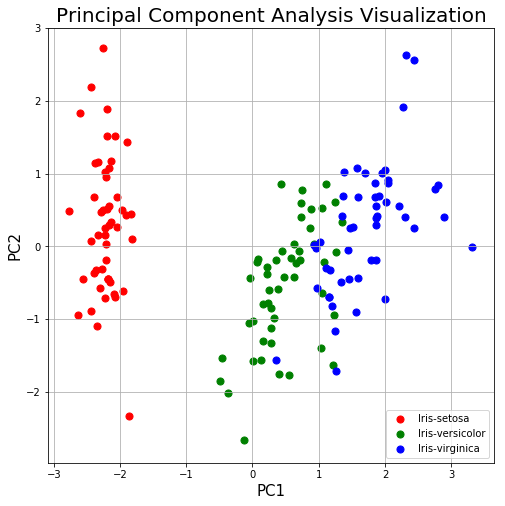

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('Principal Component Analysis Visualization', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = final_df['Species'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'PC_1']
               , final_df.loc[indicesToKeep, 'PC_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

## Explained Variance

The explained variance tells you how much information (variance) can be attributed to each of the principal components. 


In [17]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

## Influence of variables on the components

This indicates which variables have the largest effect on each component. Loadings can range from -1 to 1. 
* If the value is close to -1 or 1 that means the variable strongly influences the component. 
* if it is close to 0 that means the variable has a weak influence on the component.

In [18]:
loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns=['PC_1', 'PC_2'], index = X.columns)
df_loadings
#loadings

,PC_1,PC_2
SepalLengthCm,0.522372,0.372318
SepalWidthCm,-0.263355,0.925556
PetalLengthCm,0.581254,0.021095
PetalWidthCm,0.565611,0.065416
